# Titanic Analysis

# 1. Import the Required Libraries

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = "svg"

* Pandas is a powerful Python library that is used for data manipulation and analysis.
    * It provides data structures and operations for manipulating numerical tables and time series. 
    * The primary data structure in Pandas is the DataFrame, which can be thought of as a table of data with rows and columns.
* Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.
* Matplotlib.pyplot is a state-based interface to matplotlib. It provides an implicit, MATLAB-like, way of plotting. It also opens figures on your screen, and acts as the figure GUI manager.


# 2. Load the Dataset


In [24]:
df = pd.read_csv("/Users/mooon/Desktop/mon_python/titanic.csv")

Tells Python to load the CSV file located at the path into a DataFrame named `df`.

# 3. Data Exploration

## 3.1 Display the first few rows of the dataset to understand its structure.

In [25]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* Return the first _n_ (int, default 5) rows.
* `.head()` returns the first _n_ rows for the object based on position. 
* It is useful for quickly testing if your object has the right type of data in it.


# 3.2 Print information about the columns and their data types.

In [26]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Print a concise summary of a DataFrame. 
* This method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.

## 3.3 Show summary statistics for numerical columns (e.g., mean, min, max, etc.).

In [27]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Generate descriptive statistics. 
* Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding `NaN` values.

# 4. Data Cleaning

## 4.1 Identify and handle missing values in the dataset (e.g., fill missing age values with median).

In [28]:
df['Age'].fillna(df['Age'].median(), inplace = True)

/var/folders/1d/h1q22ch50hj0_h_vcx3pjd000000gn/T/ipykernel_9995/3612560828.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace = True)


* `.fillna` : Fill NA/NaN values using the specified method.
* The line of code fills in missing age values with the median of the age values and allows to modify the DataFrame directly on the original variable without needing to assign the result back to the DataFrame .


## 4.2 Perform any necessary data transformations or cleaning steps.

In [29]:
df.drop('Cabin', axis = 1, inplace = True)

* The percentage of missing values is high, and it becomes challenging to use the column effectively in the analysis without introducing bias or errors through data imputation. 
* The 'Cabin' column contains categorical (non-numeric) data, represented as strings in Python (hence the data type 'object'). 
* Imputing missing values in categorical data can be more complex than with numerical data.

# 5. Data Analysis

## 5.1 Calculate and display the count of passengers by gender.

In [30]:
df[["Sex", "PassengerId"]].groupby(["Sex"]).count()

,PassengerId
Sex,
female,314
male,577


1.  Select two columns from the DataFrame, 'Sex', which likely contains gender information (e.g., male or female), and 'PassengerId', which likely contains a unique identifier for each passenger. 
2.  Groups the DataFrame by the 'Sex' column. All entries with the same sex are grouped together. 
    * This aggregation function is applied to each gender group, counting the number of entries in each group. 
    * Moreover, 'PassengerId' is unique for each passenger, this counts the number of passengers of each gender.

## 5.2 Compute the average age of passengers.

In [31]:
df["Age"].mean()

29.36158249158249

Select the 'Age' column from the DataFrame and calculate the average age of all entries in the 'Age' column that are not missing (`NaN` values are automatically excluded from this calculation).

## 5.3 Determine the survival rate by passenger class.

In [32]:
survival_rates = df.groupby('Pclass')['Survived'].mean()

* This method returns a Pandas Series.
1. Group the DataFrame by the column 'Pclass', which represents the passenger class (1, 2,  3). Each unique value in 'Pclass' forms a group. 
2. After grouping, this selects the 'Survived' column from each group. 'Survived' typically contains binary values: 1 for survived and 0 for did not survive. Calculate the mean of the 'Survived' column for each group. Because 'Survived' is binary, the mean here represents the proportion of survivors within each passenger class.
    *  The index of the Series is 'Pclass', which makes it straightforward to use as the x-values in a plot.
    *  The values of the Series are the survival rates, which are used as the y-values in the plot.


# 6. Data Visualization

## 6.1 Create a bar chart to visualize the survival rate by passenger class.
## 6.2 Add appropriate labels and a title to the chart.

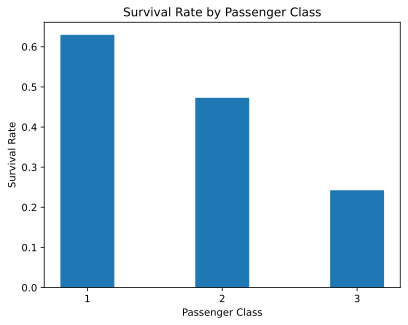

In [33]:
plt.bar(survival_rates.index, survival_rates.values, width = 0.4)
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Passenger Class')
plt.xticks(survival_rates.index)
plt.show()

# 7. Conclusion


## 7.1 Summarize your findings or insights gained from analyzing the Titanic dataset.


According to the data analysis, we can observe that first-class passengers had a higher survival rate. Also, the dataset required cleaning for missing age values, which impacted the analysis results.


## 7.2 Reflect on the importance of data cleaning and exploration in data analysis.


This analysis mentions the importance of thorough data preparation through cleansing and exploratory analysis. By ensuring that the data is clean and easy to understand, the analysis can be carried out on a solid foundation for reliable insights. Overall, the project highlights the critical role of data cleansing by reflecting how proper data management and analytics techniques can transform raw data into meaningful information and insights.
